# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install pycountry

     |████████████████████████████████| 10.1 MB 9.8 MB/s 
  Created wheel for pycountry: filename=pycountry-22.1.10-py2.py3-none-any.whl size=10595784 sha256=eb03dc6e58e78c6637dd15d4e959f1bdc60b7fe9bd2f671a8904174a43a50f8e
  Stored in directory: /root/.cache/pip/wheels/f7/8f/9c/b070d7376caf2beb0685bf72578106b2fd57019ed57d84f126
Successfully built pycountry


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from pycountry import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('/content/mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_data.shape

(4324, 9)

In [7]:
df_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [8]:
df_data.isna()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4319,False,False,False,False,False,False,False,True,False
4320,False,False,False,False,False,False,False,True,False
4321,False,False,False,False,False,False,False,True,False
4322,False,False,False,False,False,False,False,True,False


In [9]:
df_data.dropna()
df_data = df_data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

## Descriptive Statistics

In [10]:
df_data['Date'] = pd.to_datetime(df_data['Date'], utc=True)

In [11]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           964 non-null    object             
 6   Mission_Status  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), object(6)
memory usage: 236.6+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [12]:
df_data.Organisation.nunique()

56

In [13]:
launches_per_organisation = df_data.Organisation.value_counts()
v_bar = px.bar(
        x = launches_per_organisation.index,
        y = launches_per_organisation.values,
        color = launches_per_organisation.values,
        color_continuous_scale='Aggrnyl',
        title='Number of Launches per Organisation')
 
v_bar.update_layout(xaxis_title='Organisations', 
                    coloraxis_showscale=False,
                    yaxis_title='Number of Launches')
v_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [14]:
status_of_rockets = df_data.groupby(['Organisation', 'Rocket_Status'], 
                               as_index=False).agg({'Price': pd.Series.count})
status_of_rockets.sort_values('Price', ascending=False, inplace=True)

In [15]:
v_bar_split = px.bar(x = status_of_rockets.Organisation,
                     y = status_of_rockets.Price,
                     color = status_of_rockets.Rocket_Status,
                     title='Number of Launches per Organisation split by Active and Retired Rockets')
 
v_bar_split.update_layout(xaxis_title='Name of the Organisations', 
                          yaxis_title='Number of Launches')
v_bar_split.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [16]:
status_of_mission = df_data.groupby(['Organisation', 'Mission_Status'], 
                               as_index=False).agg({'Price': pd.Series.count})
status_of_mission.sort_values('Price', ascending=False, inplace=True)

In [17]:
v_bar_split = px.bar(x = status_of_mission.Organisation,
                     y = status_of_mission.Price,
                     color = status_of_mission.Mission_Status,
                     title='Number of Launches per Organisation split by Success and Failure Missions')
 
v_bar_split.update_layout(xaxis_title='Name of the Organisations', 
                          yaxis_title='Number of Launches')
v_bar_split.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [18]:
df_data['Price'].isnull().sum()

3360

In [19]:
df_data['Price'].dropna().isnull().sum()

0

In [20]:
df_data['Price'].dropna()

0        50.0
1       29.75
3        65.0
4       145.0
5       64.68
        ...  
3855     59.0
3971    63.23
3993    63.23
4000    63.23
4020    63.23
Name: Price, Length: 964, dtype: object

In [21]:
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')
print(df_data.dtypes)

Organisation                   object
Location                       object
Date              datetime64[ns, UTC]
Detail                         object
Rocket_Status                  object
Price                         float64
Mission_Status                 object
dtype: object


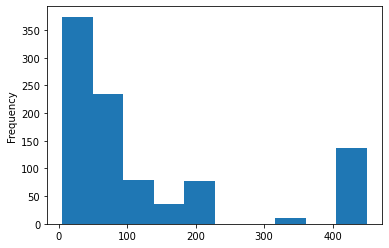

In [22]:
df_data['Price'].plot(kind='hist')

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [23]:
df_data['Country'] = df_data.Location.str.extract(r'\b(\w+)$', expand = True)
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,nan,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,nan,Failure,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,nan,Success,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,nan,Failure,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,nan,Success,Kazakhstan


In [24]:
def get_country_code(name):
    for co in list(countries):
        if name in co.name:
            return co.alpha_3
    if name == "USA":
      return "USA"

Country_Codes = []
Country_Codes = [get_country_code(alpha_3) for alpha_3 in df_data['Country']] 
print(Country_Codes)
    

['USA', 'CHN', 'USA', 'KAZ', 'USA', 'CHN', 'KAZ', 'CHN', 'USA', 'JPN', 'USA', 'CHN', 'CHN', 'ISR', 'CHN', 'NZL', 'CHN', 'USA', 'CHN', 'CHN', 'USA', 'NZL', 'CHN', 'USA', 'CHN', 'USA', 'CHN', 'USA', 'RUS', 'JPN', 'USA', 'CHN', 'CHN', 'KAZ', 'USA', None, 'CHN', 'KAZ', 'USA', 'CHN', 'KAZ', 'USA', 'RUS', 'CHN', 'CHN', 'USA', 'RUS', 'CHN', 'FRA', 'USA', 'USA', 'USA', 'IRN', 'JPN', 'KAZ', 'NZL', 'USA', 'USA', 'FRA', 'CHN', 'CHN', 'CHN', 'USA', 'CHN', 'RUS', 'KAZ', 'USA', 'CHN', 'FRA', 'USA', 'CHN', 'USA', 'IND', 'RUS', 'CHN', 'CHN', 'KAZ', 'NZL', 'USA', 'CHN', 'IND', 'FRA', 'RUS', 'CHN', 'CHN', 'CHN', 'CHN', 'USA', 'CHN', 'CHN', 'USA', 'MEX', 'CHN', 'NZL', 'USA', 'KAZ', 'CHN', 'RUS', 'KAZ', 'CHN', 'JPN', 'CHN', 'CHN', 'CHN', 'CHN', 'RUS', 'IRN', 'USA', 'KAZ', 'NZL', 'CHN', 'CHN', 'USA', 'USA', 'FRA', 'KAZ', 'KAZ', 'RUS', 'CHN', 'USA', 'CHN', 'IND', 'KAZ', 'KAZ', 'FRA', 'RUS', 'RUS', 'MEX', 'NZL', 'USA', 'CHN', 'FRA', 'USA', None, 'KAZ', 'RUS', 'USA', 'CHN', 'IND', 'CHN', 'NZL', 'USA', 'USA', 

In [25]:
df_data['Country_Codes'] = Country_Codes
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_Codes
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,nan,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,nan,Failure,USA,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,nan,Success,USA,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,nan,Failure,USA,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,nan,Success,Kazakhstan,KAZ


# Use a Choropleth Map to Show the Number of Failures by Country


In [26]:
Failure_Status = df_data[df_data.Mission_Status == 'Failure']

In [27]:
world_map = px.choropleth(Failure_Status,
                          locations='Country_Codes',
                          color='Mission_Status', 
                          hover_name='Organisation', 
                          color_continuous_scale=px.colors.sequential.matter)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [28]:
burst = px.sunburst(df_data, 
                    path=['Organisation', 'Country', 'Mission_Status'], 
                    title='The Space Missions'
                   )
 
burst.update_layout(xaxis_title='Number of Organisations', 
                    yaxis_title='Mission_Status',
                    coloraxis_showscale=False)
 
burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [29]:
df_data['Price'] = df_data['Price'].replace(np.nan, 0)

In [30]:
total_amount = df_data['Price'].sum()
print('$', total_amount, "Millions")

$ 123175.68000000002 Millions


# Analyse the Amount of Money Spent by Organisation per Launch

In [31]:
Price_Over_Launches = df_data.groupby("Organisation").agg({'Price':pd.Series.nunique})
Price_Over_Launches

,Price
Organisation,
AEB,1.00
AMBA,1.00
ASI,1.00
Arianespace,6.00
Arm??e de l'Air,1.00
Blue Origin,1.00
Boeing,4.00
CASC,9.00
CASIC,1.00


# Chart the Number of Launches per Year

In [32]:
df_data['Year'] = pd.DatetimeIndex(df_data['Date']).year

In [33]:
Launches_per_year = df_data.groupby("Year").agg({'Organisation':pd.Series.nunique})
Launches_per_year.rename(columns = {'Organisation':'nr_launches'}, inplace=True)

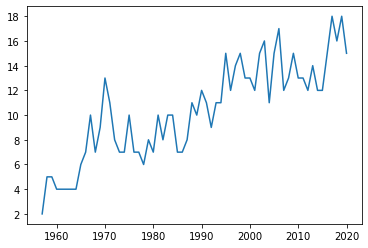

In [34]:
plt.plot(Launches_per_year.index, Launches_per_year.nr_launches)

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [35]:
df_data['Month'] = pd.DatetimeIndex(df_data['Date']).month

In [36]:
Launches_per_month = df_data.groupby("Month").agg({'Organisation':pd.Series.nunique})
Launches_per_month.rename(columns = {'Organisation':'nr_launches'}, inplace=True)

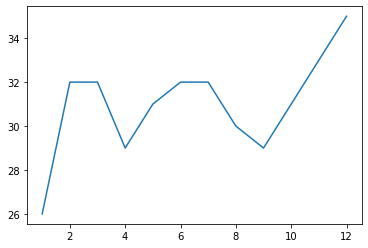

In [37]:
plt.plot(Launches_per_month.index, Launches_per_month.nr_launches)

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [38]:
Most_Popular_Month = df_data.groupby("Year").agg({'Month':pd.Series.nunique})
Most_Popular_Month.max()

Month    12
dtype: int64

In [39]:
Least_Popular_Month = df_data.groupby("Year").agg({'Month':pd.Series.nunique})
Least_Popular_Month.min()

Month    3
dtype: int64

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

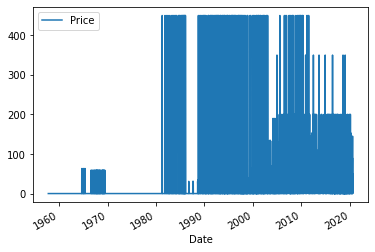

In [40]:
lines = df_data.plot.line(x='Date', y='Price')

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [47]:
Launches_over_Time = df_data.groupby("Organisation").agg({'Date':pd.Series.nunique})
Launches_over_Time.sort_values('Date', ascending=False).head(10)

,Date
Organisation,
RVSN USSR,1777
Arianespace,279
General Dynamics,251
CASC,250
NASA,203
VKS RF,201
US Air Force,161
ULA,140
Boeing,136


# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [74]:
USA_Cold_War = df_data.groupby('Year').agg({'Country':pd.Series.nunique})
USA_Cold_War[df_data['Year'] < 1991]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Country
Year,
1957,2
1958,2
1959,2
1960,2
1961,3
...,...
2016,9
2017,9
2018,9


In [76]:
USSR_Cold_War = df_data[df_data['Organisation'] == 'RVSN USSR'].groupby('Year').agg({'Country':pd.Series.nunique})
USSR_Cold_War

,Country
Year,
1957,1
1958,1
1959,1
1960,1
1961,2
1962,2
1963,2
1964,2
1965,2



## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

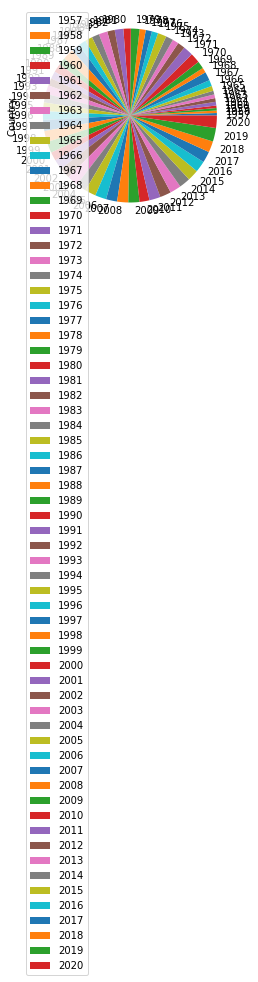

In [84]:
USA_Cold_War.groupby(['Year']).sum().plot(kind='pie', y='Country')

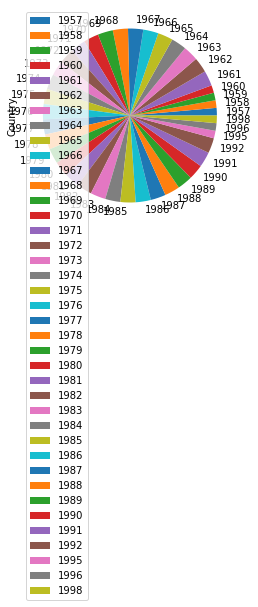

In [85]:
USSR_Cold_War.groupby(['Year']).sum().plot(kind='pie', y='Country')

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

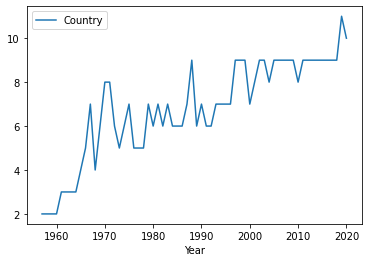

In [90]:
pv = pd.pivot_table(USA_Cold_War, index=USA_Cold_War.index,
                    values='Country', aggfunc='sum')
pv.plot()

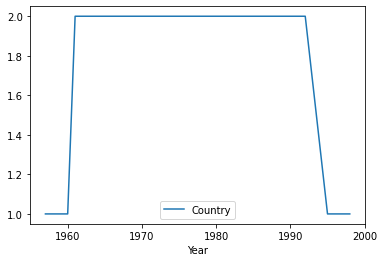

In [91]:
pv = pd.pivot_table(USSR_Cold_War, index=USSR_Cold_War.index,
                    values='Country', aggfunc='sum')
pv.plot()

## Chart the Total Number of Mission Failures Year on Year.

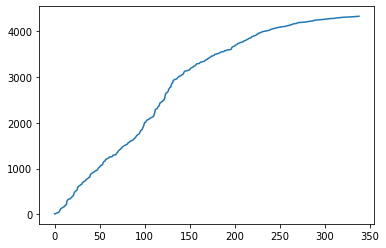

In [102]:
plt.plot(Failure_Status.index)